# Library and Global Variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import os
import sys
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0, '..') # to access the module one level up

In [3]:
from Transliterate.transliterate.utils.vowels import Vowels

In [4]:
VOWELS = Vowels().all_vowels

# Preparing the Methods


In [18]:
def get_bi_phonemes(csv_path: str, show_results=False) -> defaultdict:

    df = pd.read_csv(csv_path)
    bi_phonemes = defaultdict(int)

    for index, row in df.iterrows():
        thai_phonemes = row['thai phoneme'].split(' ')
        
        for i in range(len(thai_phonemes) - 1):
            current_phoneme = thai_phonemes[i]
            next_phoneme = thai_phonemes[i + 1]
            eos = True

            if i != len(thai_phonemes) - 2:
                eos = False
                next_next_phoneme = thai_phonemes[i + 2]

            if current_phoneme not in VOWELS:
                if next_phoneme in VOWELS:
                    bi_phonemes[(current_phoneme, next_phoneme)] += 1
            else:
                if not eos:
                    if next_phoneme not in VOWELS and next_next_phoneme not in VOWELS:
                        bi_phonemes[(current_phoneme, next_phoneme)] += 1

    if show_results:
        for bigram, count in bi_phonemes.items():
            print(f"{bigram}: {count}")

        print(f"Total bi-phonemes: {sum(bi_phonemes.values())}")

    return bi_phonemes

def unknown_bi_phonemes(bi_phonemes1: defaultdict, bi_phonemes2: defaultdict) -> list:
    unknown = []
    for phoneme in bi_phonemes1.keys():
        if phoneme not in bi_phonemes2.keys():
            unknown.append(phoneme)

    return unknown
    
def compare_bi_phonemes(bi_phonemes1: defaultdict, title_1: str , bi_phonemes2: defaultdict, title_2: str) -> None:
    bi_phonemes2 = {k: v for k, v in sorted(bi_phonemes2.items(), key=lambda item: item[1], reverse=True)}
    total_bi_phonemes = list(bi_phonemes2.keys()) + unknown_bi_phonemes(bi_phonemes1, bi_phonemes2)

    bi_phoneme_1_counts = [bi_phonemes1.get(ph, 0) for ph in total_bi_phonemes]
    bi_phoneme_2_counts = [bi_phonemes2.get(ph, 0) for ph in total_bi_phonemes]   

    np_bi_phonemes1_counts = np.array(bi_phoneme_1_counts) / sum(bi_phoneme_1_counts)
    np_bi_phonemes2_counts = np.array(bi_phoneme_2_counts) / sum(bi_phoneme_2_counts)

    index = np.arange(len(total_bi_phonemes))
    bar_height = 0.5
    fig, ax = plt.subplots(figsize=(10, 60))

    bar1 = ax.barh(index, np_bi_phonemes1_counts, bar_height, color='blue', label=title_1)
    ax.plot(np_bi_phonemes2_counts, index, color='red', label=title_2)
    ax.set_title('Bi Phoneme Distributions Comparison')
    ax.set_xlabel('Count')
    ax.set_ylabel('Phonemes')
    ax.set_yticks(index)
    ax.set_yticklabels(total_bi_phonemes, fontsize=8)
    ax.legend()

    plt.savefig('./ThaiBiPhonemesDistribution.png')
    plt.show()


In [19]:
generated_path = '../generated/processed/combined_sentences_with_phoneme.csv'
tsync2_path = '../tsync2/processed/combined_tsync2_thai_sentences_phoneme.csv'

generated_bi_phonemes = get_bi_phonemes(generated_path)
tsync2_bi_phonemes = get_bi_phonemes(tsync2_path)

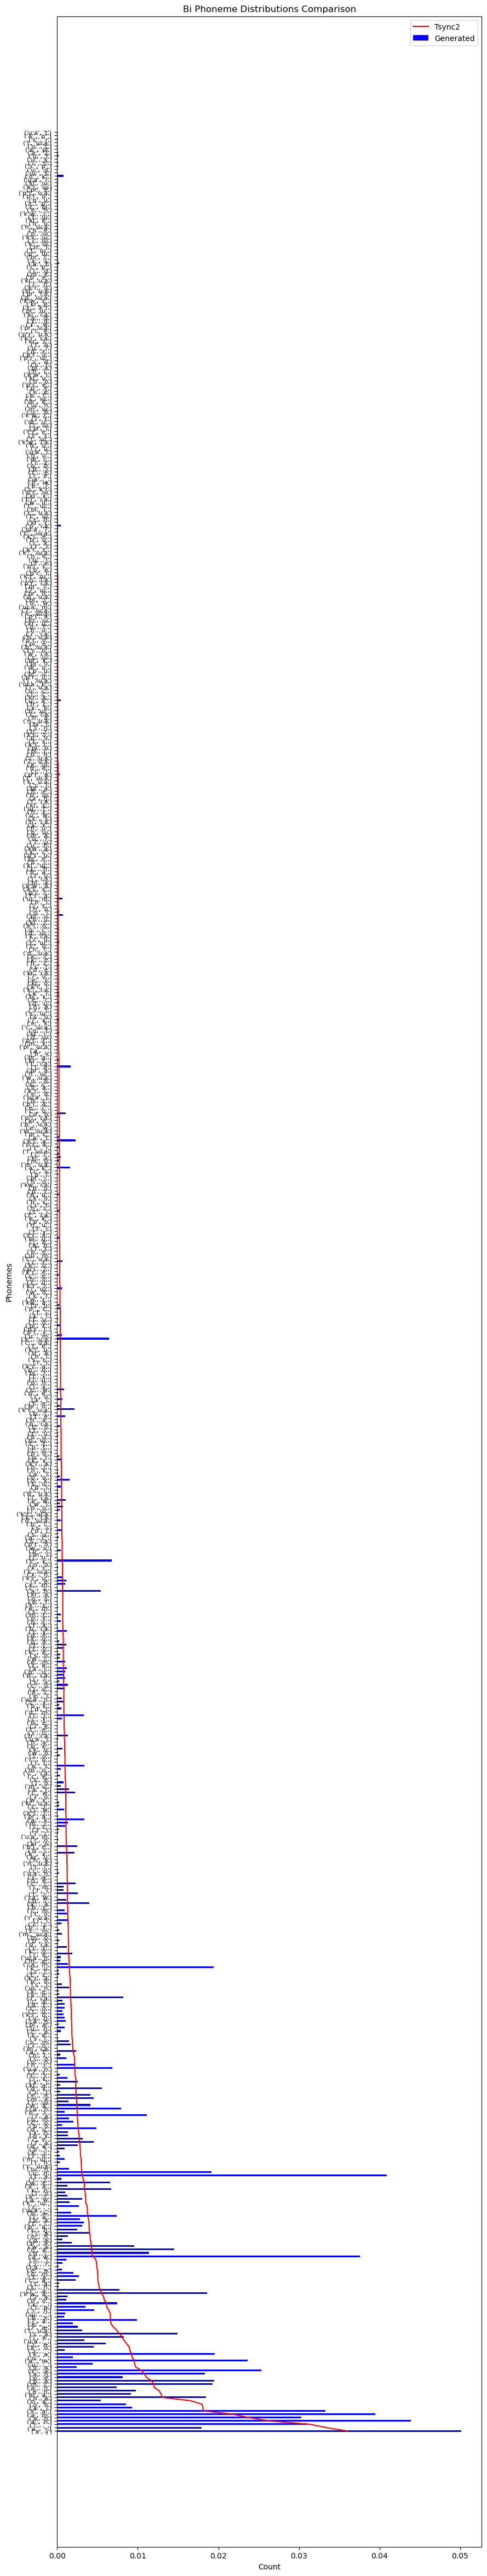

In [20]:
compare_bi_phonemes(generated_bi_phonemes, 'Generated', tsync2_bi_phonemes, 'Tsync2')